## **2D Laplace Equation**

Here is Laplace's equation in 2D:

$$ \frac{\partial^{2}{p}}{\partial{x^{2}}} + \frac{\partial^{2}{p}}{\partial{y^{2}}} = 0 $$

This must be discretised using the central difference scheme:

$$  \frac{p_{i + 1,j}^{n} - 2p_{i,j}^{n} + p_{i - 1,j}^{n}}{\Delta{x^{2}}} + \frac{p_{i,j + 1}^{n} - 2p_{i,j}^{n} + p_{i, j - 1}^{n}}{\Delta{y^{2}}} = 0  $$

We can solve for $p_{i,j}^{n}$ as follows:

$$  p_{i,j}^{n} = \frac{\Delta{y^{2}}(p_{i + 1,j}^{n} + p_{i - 1,j}^{n}) + \Delta{x^{2}}(p_{i,j + 1}^{n} + p_{i,j - 1}^{n})}{2(\Delta{x^{2}} + \Delta{y^{2}})}  $$

#### **Initial Conditions:**

$$  p = 0 \quad\forall{x_{i} \in X^{2}}  $$

#### **Boundary Conditions:**

$$
\begin{aligned}
    p(x = 0) &= 0\\
    p(x = 2) &= 2\\
    \frac{\partial{p}}{\partial{y}}(y = 0, 1) &= 0\\
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

p = np.zeros((ny, nx))

x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

p[:, 0] = 0          # p = 0     @ x = 0
p[:, -1] = y         # p = y     @ x = 2
p[0, :] = p[1, :]    # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

In [3]:
def laplace2d(p, y, dx, dy, target):
    
    l1norm = 1
    pn = np.empty_like(p)
    
    while l1norm > target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) + dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) / (2 * (dx**2 + dy**2)))
            
        # boundary conditions
        p[:, 0] = 0          # p = 0     @ x = 0
        p[:, -1] = y         # p = y     @ x = 2
        p[0, :] = p[1, :]    # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        
        # calculate loss
        l1norm = (np.sum(np.abs(p) - np.abs(pn)) / np.sum(np.abs(pn)))
        
    return p

(0.0, 1.0)

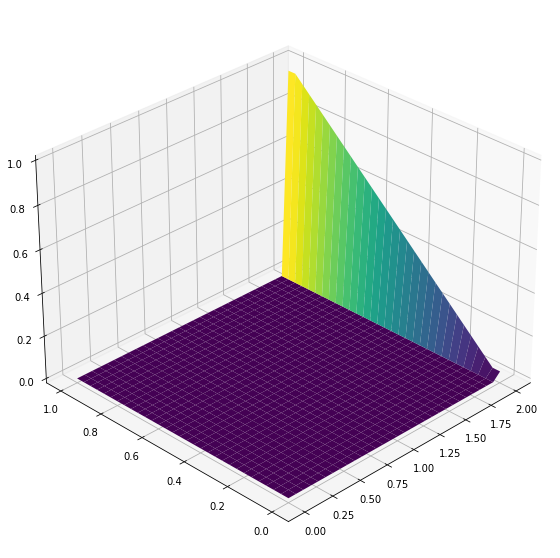

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, p, cmap='viridis')
ax.view_init(30, 225)
ax.set_zlim(0, 1)

In [5]:
p = laplace2d(p, y, dx, dy, 1e-5)

(0.0, 1.0)

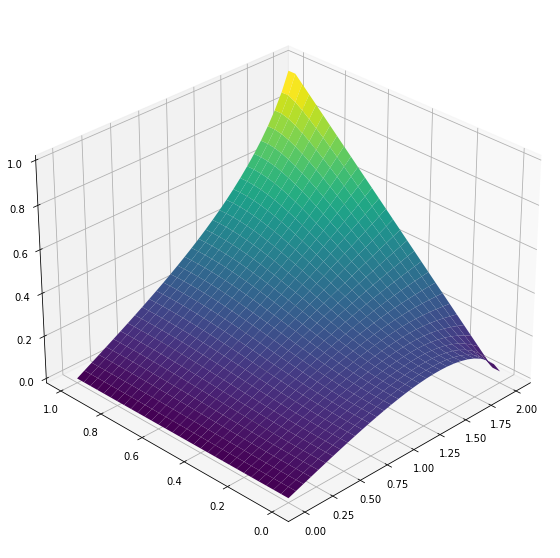

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, p, cmap='viridis')
ax.view_init(30, 225)
ax.set_zlim(0, 1)